In [1]:
product,quantity,price
Pen,10,5
Notebook,3,40
Eraser,5,3


NameError: name 'product' is not defined

In [2]:
import os
import pandas as pd

# Step 1: Create folder if not exists
os.makedirs("sales_data", exist_ok=True)

# Step 2: Create sample sales data for 3 days
data = [
    {"product": "Pen", "quantity": 10, "price": 5},
    {"product": "Book", "quantity": 3, "price": 40},
    {"product": "Eraser", "quantity": 5, "price": 3},
]

dates = ["2025_11_03", "2025_11_04", "2025_11_05"]

for d in dates:
    df = pd.DataFrame(data)
    df.to_csv(f"sales_data/sales_{d}.csv", index=False)

print("✅ sales_data folder and CSV files created successfully!")


✅ sales_data folder and CSV files created successfully!


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import datetime


In [2]:
# Look for all CSVs in the folder
files = glob.glob("sales_data/*.csv")

# Pick the most recent one by modification time
latest_file = max(files, key=lambda f: datetime.datetime.strptime(f.split('_')[-1].split('.')[0], "%Y_%m_%d"))

print("📁 Latest data file:", latest_file)


ValueError: time data '03' does not match format '%Y_%m_%d'

In [3]:
import glob

files = glob.glob("sales_data/*.csv")
print("Found files:", files)


Found files: ['sales_data\\sales_2025_11_03.csv', 'sales_data\\sales_2025_11_04.csv', 'sales_data\\sales_2025_11_05.csv']


In [4]:
import datetime
import os
import re

# --- use the file list you already have ---
# (re-run this if notebook restarted)
import glob
files = glob.glob("sales_data/*.csv")

# --- extract YYYY_MM_DD date from each filename ---
def extract_date_from_filename(path):
    name = os.path.basename(path)           # e.g. sales_2025_11_03.csv
    match = re.search(r'(\d{4}_\d{2}_\d{2})', name)
    if match:
        return datetime.datetime.strptime(match.group(1), "%Y_%m_%d")
    return None

# --- find file with the latest date ---
dated_files = [(f, extract_date_from_filename(f)) for f in files if extract_date_from_filename(f)]
latest_file = max(dated_files, key=lambda x: x[1])[0]

print("📁 Latest data file:", latest_file)


📁 Latest data file: sales_data\sales_2025_11_05.csv


In [5]:
import pandas as pd

df = pd.read_csv(latest_file)
df["Revenue"] = df["quantity"] * df["price"]
df


,product,quantity,price,Revenue
0,Pen,10,5,50
1,Book,3,40,120
2,Eraser,5,3,15


In [6]:
total_revenue = df["Revenue"].sum()
best_product = df.loc[df["Revenue"].idxmax(), "product"]

print("===== Auto Dashboard Summary =====")
print("Latest File:", latest_file)
print("Total Revenue: ₹", total_revenue)
print("Best Product:", best_product)


===== Auto Dashboard Summary =====
Latest File: sales_data\sales_2025_11_05.csv
Total Revenue: ₹ 185
Best Product: Book


In [8]:
today = datetime.date.today().strftime("%Y_%m_%d")
df.to_csv(f"sales_report_{today}.csv", index=False)
plt.savefig(f"revenue_chart_{today}.png")
print("✅ Report and chart saved for", today)


✅ Report and chart saved for 2025_11_05


<Figure size 640x480 with 0 Axes>

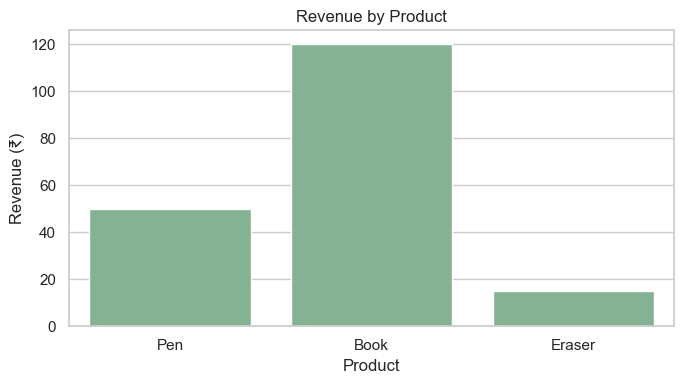

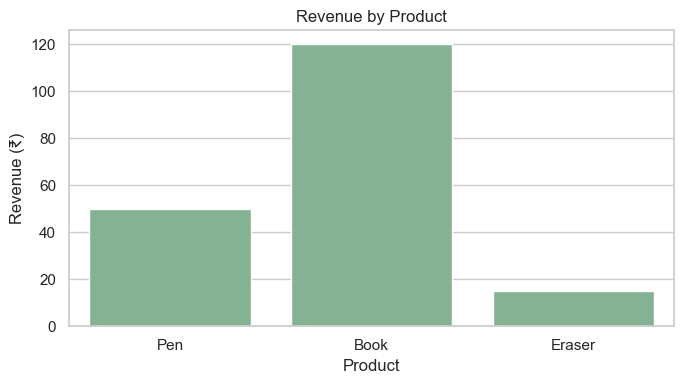


Saved file: revenue_chart_2025_11_05.png  — size: 13941 bytes
✅ The chart was saved correctly.


In [9]:
import os, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# --- prepare data (replace with your df if already loaded) ---
# If df is already in your notebook, skip creating it and comment next block.
import pandas as pd
if 'df' not in globals():
    df = pd.read_csv("sales_data/sales_2025_11_05.csv")
    df["Revenue"] = df["quantity"] * df["price"]

# --- plot and save robustly ---
sns.set_theme(style="whitegrid", palette="crest")

plt.figure(figsize=(7,4))
ax = sns.barplot(x="product", y="Revenue", data=df)
ax.set_title("Revenue by Product")
ax.set_xlabel("Product")
ax.set_ylabel("Revenue (₹)")

plt.tight_layout()

today = datetime.date.today().strftime("%Y_%m_%d")
savepath = f"revenue_chart_{today}.png"

try:
    # Save before show to avoid issues where the figure is cleared after show()
    plt.savefig(savepath, bbox_inches='tight')
    # Display saved image inline so you can verify it's not empty
    display(Image(filename=savepath))
    # Also show it via matplotlib (optional)
    plt.show()
    # Close the figure to free memory / avoid duplicate empty saves later
    plt.close()
except Exception as e:
    print("Error when saving/displaying the chart:", e)

# --- check file size to ensure it's not empty ---
if os.path.exists(savepath):
    size = os.path.getsize(savepath)
    print(f"\nSaved file: {savepath}  — size: {size} bytes")
    if size == 0:
        print("⚠️ The saved file is 0 bytes. Possible permission or write error.")
    else:
        print("✅ The chart was saved correctly.")
else:
    print("⚠️ File was not created — check write permissions and path.")


In [10]:
import os
print("cwd:", os.getcwd())
print("Can write here?", os.access(".", os.W_OK))


cwd: C:\Users\UK Gupta\Phase_3_Automation_Projects
Can write here? True


In [11]:
for f in os.listdir('.'):
    if f.startswith('revenue_chart'):
        print(f, os.path.getsize(f))


revenue_chart_2025_11_05.png 13941


In [12]:
today = datetime.date.today().strftime("%Y_%m_%d")
df.to_csv(f"sales_report_{today}.csv", index=False)
plt.savefig(f"revenue_chart_{today}.png")
print("✅ Report and chart saved for", today)


✅ Report and chart saved for 2025_11_05


<Figure size 640x480 with 0 Axes>

In [13]:
from IPython.display import clear_output
import time

while True:
    clear_output(wait=True)
    %run dashboard.ipynb
    time.sleep(3600)   # rerun every 1 hour


Exception: File `'dashboard.ipynb'` not found.

Text(0.5, 1.0, 'Revenue by Product – Updated 2025-11-05')

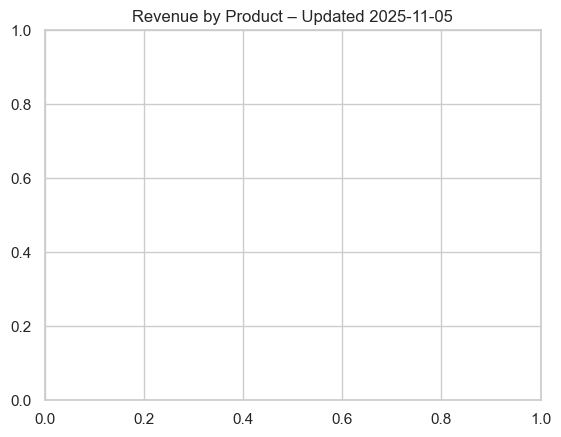

In [14]:
plt.title(f"Revenue by Product – Updated {datetime.date.today()}")
